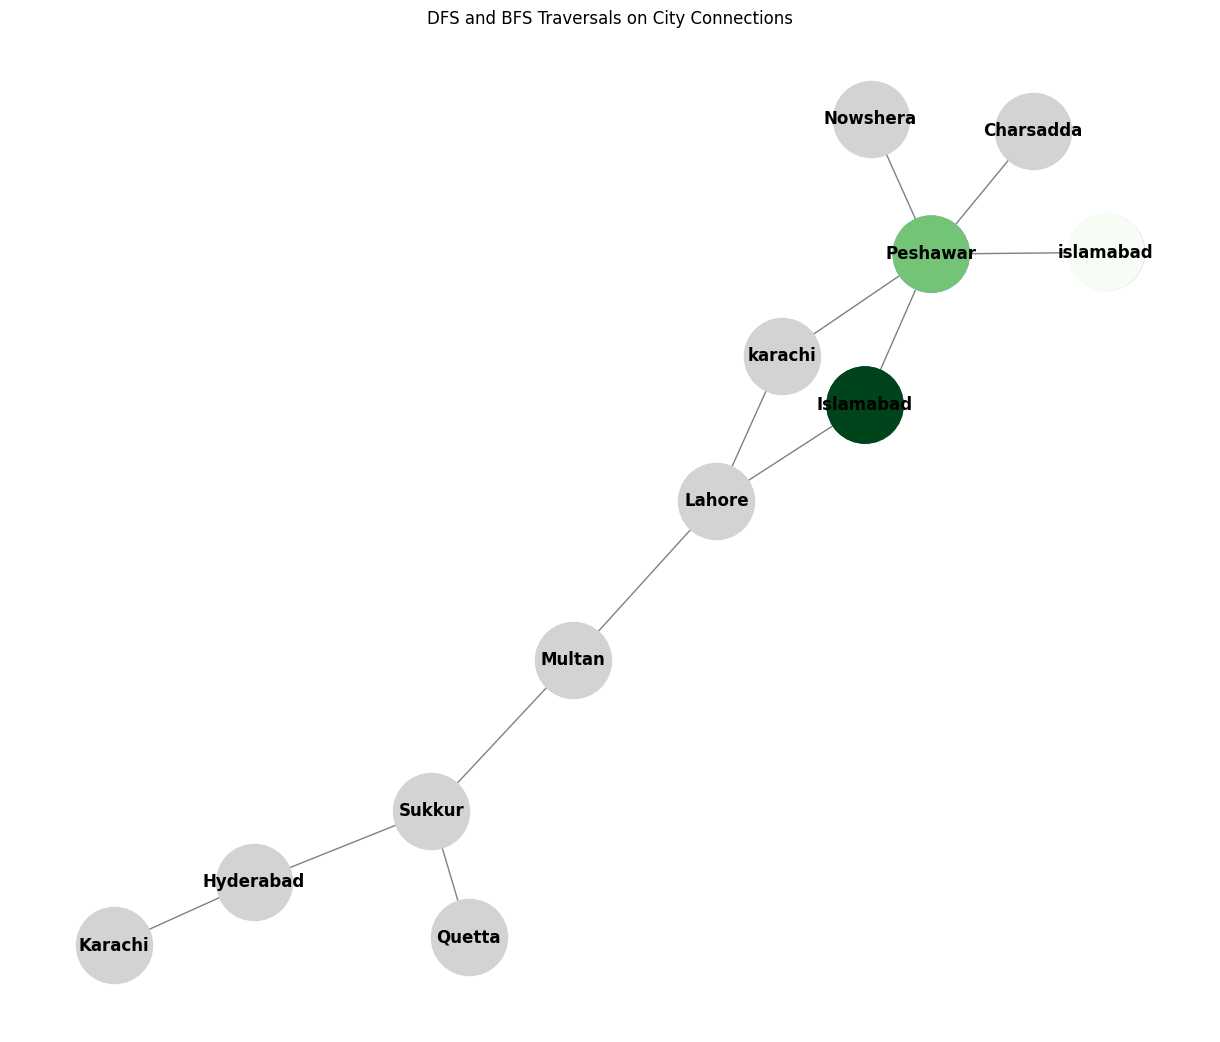

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
pakistan_cities = {
    'islamabad': ['Peshawar'],
    'Charsadda': ['Peshawar'],
    'Nowshera': ['Peshawar'],
    'Peshawar': [ 'charsadda' , 'nowshera'],
    'Hyderabad': ['Karachi', 'Sukkur'],
    'Sukkur': ['Hyderabad', 'Multan', 'Quetta'],
    'Multan': ['Sukkur', 'Lahore'],
    'Quetta': ['Sukkur'],
    'Lahore': ['Multan', 'Islamabad'],
    'karachi': ['Lahore', 'Peshawar'],
    'Peshawar': ['Islamabad']
}

G = nx.Graph()

for city, neighbors in pakistan_cities.items():
    for neighbor in neighbors:
        G.add_edge(city, neighbor)

def dfs(graph, start):
    visited = set()
    traversal_order = []

    def dfs_helper(city):
        visited.add(city)
        traversal_order.append(city)

        for neighbor in graph.get(city, []):
            if neighbor not in visited:
                dfs_helper(neighbor)

    dfs_helper(start)
    return traversal_order


def bfs(graph, start):
    visited = set()
    queue = deque([start])
    traversal_order = []
    visited.add(start)

    while queue:
        city = queue.popleft()
        traversal_order.append(city)

        for neighbor in graph.get(city, []):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

    return traversal_order


dfs_order = dfs(pakistan_cities, 'islamabad')
bfs_order = bfs(pakistan_cities, 'islamabad')

plt.figure(figsize=(12, 10))

pos = nx.spring_layout(G)


nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightgray", font_size=12, font_weight="bold", edge_color="gray")


dfs_colors = [i / len(dfs_order) for i in range(len(dfs_order))]
nx.draw_networkx_nodes(G, pos, nodelist=dfs_order, node_color=dfs_colors, cmap=plt.cm.Blues, node_size=3000)


bfs_colors = [i / len(bfs_order) for i in range(len(bfs_order))]
nx.draw_networkx_nodes(G, pos, nodelist=bfs_order, node_color=bfs_colors, cmap=plt.cm.Greens, node_size=3000)

plt.title("DFS and BFS Traversals on City Connections")
plt.show()
